CONCATENING TEXT DATASETS, DON'T HAVE TO RUN THIS SECTION ANYMORE

In [4]:
from datasets import load_dataset
from convokit import Corpus, download
from datasets import Dataset, concatenate_datasets
import random

In [ ]:
#DONT RUN THIS ANYMORE
ds_ag_news = load_dataset("fancyzhx/ag_news") #news, formal
ds_sms = load_dataset("ucirvine/sms_spam") #should only use ham labels, text messages, informal
ds_edu = load_dataset("Locutusque/UltraTextbooks") #synthetic and human written textbooks..... acdademic / formal
#https://huggingface.co/datasets/fabiochiu/medium-articles
ds_medium = load_dataset('csv', data_files='/Users/rheamadhogarhia/Desktop/Year 3/NLP/nlpfinal/medium_articles.csv') #medium articles, academic but also likely less formal ? community contributions
#https://huggingface.co/datasets/kariatouk/enron_curated_labeled/tree/main
ds_enron= load_dataset('csv', data_files='/Users/rheamadhogarhia/Desktop/Year 3/NLP/nlpfinal/enron_labeled_curated.csv') #enron, very formal business emails probably?


ds_podcast_news = load_dataset("Whispering-GPT/lex-fridman-podcast")
ds_telephone_convos = Corpus(filename=download("switchboard-corpus"))
ds_ted_talk_edu = load_dataset('csv', data_files="/Users/rheamadhogarhia/Desktop/Year 3/NLP/nlpfinal/ted_talks_en.csv")
ds_business_meetings = load_dataset("edinburghcstr/ami", "ihm")
ds_un_debates = load_dataset('csv', data_files="/Users/rheamadhogarhia/Desktop/Year 3/NLP/nlpfinal/un-general-debates.csv")

#this cell ran in 21 minutes (probably don't have to load the whole dataset?)



Resolving data files:   0%|          | 0/23 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/23 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/91 [00:00<?, ?it/s]

In [ ]:
#TRAIN SETS, choosing 500 samples frome each written text set
num_samples = 1000
ds_ag_news_sub = ds_ag_news["train"].shuffle(seed=42).select(range(num_samples))

#filtering out the spam label - only getting legitimate texts
ds_sms_filtered = ds_sms["train"].filter(lambda example: example['label'] == 0)
ds_sms_sub = ds_sms_filtered.shuffle(seed=42).select(range(num_samples))

ds_edu_sub = ds_edu["train"].shuffle(seed=42).select(range(num_samples))
ds_medium_sub = ds_medium["train"].shuffle(seed=42).select(range(num_samples))
ds_enron_sub = ds_enron["train"].shuffle(seed=42).select(range(num_samples))


In [ ]:
#combine
ag_news_dataset = Dataset.from_dict({"text": ds_ag_news_sub["text"], 
                                     "source": ["ag_news"] * len(ds_ag_news_sub)})
medium_dataset = Dataset.from_dict({"text": ds_medium_sub["text"], 
                                    "source": ["medium"] * len(ds_medium_sub)})
edu_dataset = Dataset.from_dict({"text": ds_edu_sub["text"], 
                                 "source": ["textbooks"] * len(ds_edu_sub)})
sms_dataset = Dataset.from_dict({"text": ds_sms_sub["sms"], 
                                 "source": ["sms"] * len(ds_sms_sub)})
enron_dataset = Dataset.from_dict({"text": ds_enron_sub["email"], 
                                   "source": ["enron_emails"] * len(ds_enron_sub)})


combined_dataset = concatenate_datasets([ag_news_dataset, medium_dataset, edu_dataset, sms_dataset, enron_dataset])

combined_dataset = combined_dataset.add_column("type", ["written"] * len(combined_dataset))

#Shuffle
combined_dataset = combined_dataset.shuffle(seed=42)

combined_dataset.to_csv("shuffled_combined_data_with_type.csv")

print(combined_dataset[:5])


Creating CSV from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

{'text': ['Security designed to meet the needs of your business.\n\nToday, there are too many security controls and not enough talent to manage the complexity. We understand organizations may have limited time and resources; and security needs to be simple and end to end.\n\nAs an organization, your employees have left the building; you definitely need security controls that span across your offices and users wherever they are, whatever devices they are using, across the cloud, through the network and onto the endpoint.\n\nYour security controls also need to allow your employees to stay connected, protected and productive seamlessly.\n\nAt Signal Alliance, we often speak with businesses who believe that, because they are small, they aren’t interesting to the hacktivists and cyber criminals.\n\nActually, we see the reverse, often the smaller customers are a gateway to the bigger ones. Supply chain attacks like this are responsible for some of the biggest breaches that we’ve seen. The br

In [7]:
import pandas as pd
import numpy as np

START RUNNING FROM HERE

In [9]:
combined_dataset = pd.read_csv("combined_dataset.csv")

In [11]:
combined_dataset.info()
combined_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   type    5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


,text,type
0,"Railroads spread across the country, creating ...",written
1,MAKE THE BEST OF THE BEAR SEASON WITH VERASWAP...,written
2,eams. If someone is interested in a part=\nic...,written
3,STARBUCKS (SBUX) INVESTOR DAY 2020 — CEO and C...,written
4,"Enron's accounting firm, Andersen, has admitte...",written


In [12]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from tqdm import tqdm

from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /Users/Shivani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/Shivani/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [13]:
def preprocess_corpus(data):
    """ Tokenize, sentencize, and lowercase the input data.

        Args:
            data: list of strings, where each string is a document

        Return:
            list of lists, with tokenized, lowercased sentences from each of the processed rows
    """
    tokenized_sentences = []

    for doc in tqdm(data):
        sentences = sent_tokenize(doc)
        for sentence in sentences:
            tokenized_sentences.append(word_tokenize(sentence.lower()))
    return tokenized_sentences

In [ ]:
ds_processed = preprocess_corpus(combined_dataset['text'])
ds_processed[:3]

#### Dataset Preprocessing and Analysis ####

In [18]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords list
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def analyze_tokens(tokenized_data):
    """ Perform token & vocabulary analysis.

        Args:
            tokenized_data: List of tokenized sentences (list of lists)
            dataset_name: String, name of the dataset for labeling
    """
    # Flatten tokenized sentences into a single list of words
    all_words = [word for sentence in tokenized_data for word in sentence]

    # Vocabulary size
    vocab_size = len(set(all_words))
    print(f"Vocabulary Size: {vocab_size}")

    # Most common words
    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(20)
    print(f"Most Common Words:")
    print(most_common_words)

    # Stopword Distribution
    stopword_count = sum(word_counts[word] for word in stop_words if word in word_counts)
    total_words = sum(word_counts.values())
    stopword_ratio = stopword_count / total_words
    print(f"Stopword Ratio: {stopword_ratio:.2%}\n")

    # Plot Most Common Words
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.xticks(rotation=45)
    plt.title(f"Most Common Words")
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Shivani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vocabulary Size: 90308
Most Common Words:
[('the', 138260), (',', 119042), ('.', 116408), ('and', 74151), ('of', 70754), ('to', 64061), ('a', 52446), ('in', 45115), ('is', 31617), (')', 27764), ('(', 27457), ('that', 26888), ('for', 23835), (':', 22065), ('with', 17746), ('it', 17090), ('as', 16191), ('i', 15472), ('on', 15374), ('this', 13934)]
Stopword Ratio: 35.61%



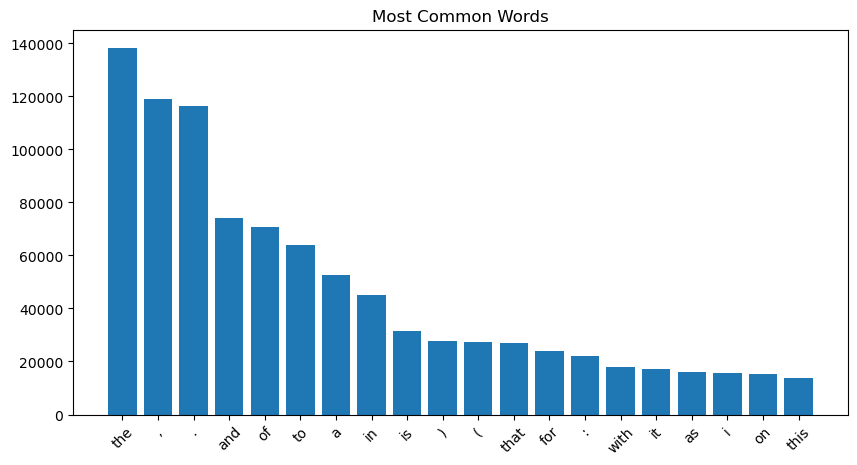

In [19]:
analyze_tokens(ds_processed)

Potentially Remove Stopwords?

### Shivani: Mini BERT & SHAP Test ###
Going to start testing how BERT/TogetherAI and SHAP will work using a super small subset of the data

In [1]:
from together import Together

client = Together()

response = client.embeddings.create(
  model = "togethercomputer/m2-bert-80M-8k-retrieval",
  input = "Our solar system orbits the Milky Way galaxy at about 515,000 mph"
)

AuthenticationError: The api_key client option must be set either by passing api_key to the client or by setting the TOGETHER_API_KEY environment variable

In [5]:
import os 
os.environ["TOGETHER_API_KEY"] = "tgp_v1_0k4LmNbB6di_vPP-tYoWKw8_eEO2o6qzpKcYHRt1j9Q"

In [6]:
from together import Together

client = Together()

stream = client.chat.completions.create(
  model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
  messages=[{"role": "user", "content": "What are the top 3 things to do in New York?"}],
  stream=True,
)

for chunk in stream:
  print(chunk.choices[0].delta.content or "", end="", flush=True)

New York City is a vibrant and diverse destination with countless attractions and activities to explore. Here are the top 3 things to do in New York:

1. **Visit the Statue of Liberty and Ellis Island**: Take a ferry to Liberty Island to see the iconic Statue of Liberty up close and learn about its history and significance. You can also visit the Ellis Island Immigration Museum to discover the stories of immigrants who passed through the island's immigration station.

2. **Explore the Metropolitan Museum of Art**: The Met is one of the world's largest and most famous museums, with a collection that spans over 5,000 years of human history. From ancient Egyptian artifacts to modern and contemporary art, the Met has something for everyone.

3. **Walk across the Brooklyn Bridge**: This iconic bridge offers stunning views of the Manhattan skyline, the East River, and Brooklyn. Take a walk across the bridge, stop at the Brooklyn Bridge Park, and enjoy the street performers, food vendors, and